# Data Mining Final Project
Julien Belahbib & Christelle Xu

June 16, 2017

## 1. Introduction
Sentiment analysis uses methods from natural language processing, statistics and machine learning to classify text corpora, the most fundamental case being the binary classification of the text as having positive or negative undertones. Another more general case would be classification of the text into ratings from 1-5, facilitated by the labeled data scraped from sites such as Amazon or IMDB.
 
Even simple exercises such as these have wide ranging consequences particularly for large companies who, with their enormous amounts of data, can draw important conclusions and make important decisions based on the attitudes, opinions, and emotions of their customers. Sentiment analysis techniques have obviously become extremely sophisticated and go far beyond what we’ll tackle in this project. 
 
The aim of this project is to predict the rating a user assigns to a product based on the written review. Our program was created based on the data we had on hand, but should be able to predict the user’s rating for an entirely new product with reasonable accuracy given the constraints of the model. We explored a number of different methods to solve our multi-class classification problem, ranging from Naive Bayes model to a simple feedforward neural network.


## 2. Description of Data

We received five pre-labeled datasets of reviews of toiletries sold on Amazon including Always, Gillette, Oral-B, Pantene, and Tampax, which had input sizes of 420, 2750, 3063, 423, and 165, respectively, giving us a total of 6821 input values. The data includes the following eight columns:
 
**Id_review**: Identification of a review - is sequential by date of review. <br>
**Date**: The date given by year/month/day<br>
**Product_id**: This is a unique identification code assigned to a product by Amazon. <br>
**User_rating**: The score out of five assigned to a product by a user.<br>
**Date_other_format**: The above date reformatted as month day, year.<br>
**User_id**: A unique identification code assigned to a user by Amazon.<br>
**Title**: Title given to a review by the user.<br>
**Review**: Feedback of the product given by the user<br>
 
The fact that the datasets aren’t of the same size isn’t a problem since we will merge them into one large dataset. What could be a problem is the fact that all five datasets concern toiletries. It could be argued that the terms used to qualify these types of items wouldn’t be the same as terms used in categories such as electronics.





## 3. Problems Encountered
We encountered a number of problems when importing our data. 

1. Formatting issues:<ul>
<li>Oral-b, Gillette, and Pantene had a large amount of whitespace between rows as part of the csv file, these lines were removed.</li><br>
<li>Pantene and Gillette not only had whitespace but had foreign text and HTML code. These lines were dropped as they were not helpful to our aims.</li><br>
<li>Oral-b  was encoded in cp850 instead of utf-8 like all the other datasets, which posed a problem on Windows. It was therefore recoded into utf-8.</li> <br>
</ul>

2. Review column cleanup:<ul>
<li>There were a number of foreign symbols that impeded the functioning of our model, they were removed.</li><br>
<li>Gillette had a Spanish review in line n°714, it was removed.</li><br>
</ul>




## 4. Exploratory Data Analysis

We see that our dataset has an overwhelming proportion of ratings equal to five. This will be a problem since it biases our model towards five star reviews and may affect our precision and recall values particularly for minority classes. We also look at the most common words in the reviews. In both our base and final model, we’ve removed stop words - words that commonly appear but don’t add much value to the analysis. 
 
When we look at the data and get a summary statistic we see that the distribution of the rating isn’t distributed evenly. The majority of reviews have a rating of 5, and the fact that the mean of the data is 4.11 (Figure 4.1) implies that our data is extremely right skewed. This is also evident in the right skew of the histogram of the ratings.(Figure 4.2) It is worth noting, however, that this pattern is consistent across all products.

Figures 4.5 - 4.10 show the distribution of the ratings for each dataset. Note that each dataset is extremely right skewed. Their figures are included in the appendix.

### Figure 4.2 Histogram of Ratings

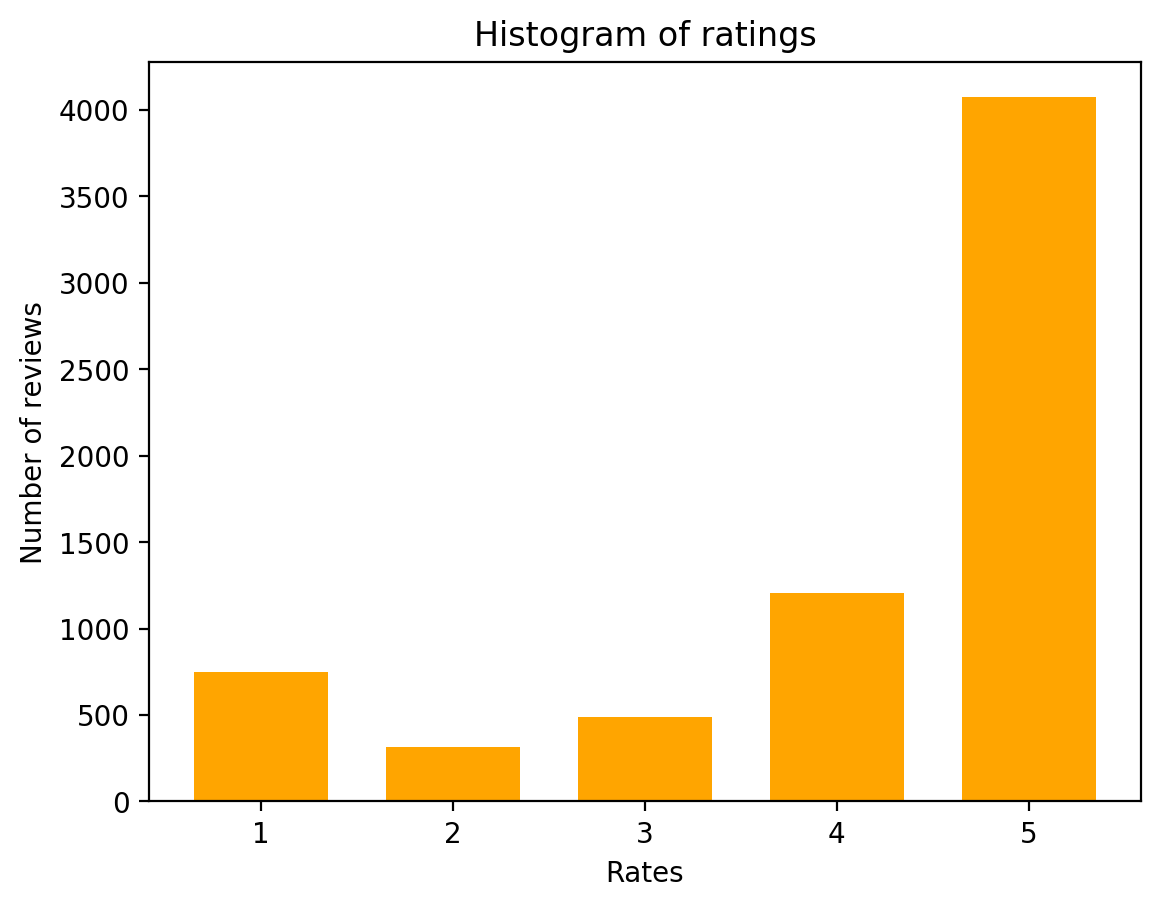

In [4]:
from IPython.display import Image
Image(filename='Explor.png')

We also realized when looking at the 50 most common words, ‘t’ was by far the most common with 4500 occurrences. We take that this t was separated from various contractions. We therefore remove these t’s given that the negativity inferred from words such as “don’t” even if this may be problematic for words such as “can’t” which reverts to “can” and where we lose its negativity in the process. Along the same lines, we’ve noticed that “b” also showed up numerous times as part of the the b in “oral-b”. We’ve therefore removed the letter from consideration. (Figures 4.3)

After the removal of the t's and b's the plot of the 30 most common words looks more normal. We see that the 5th and 6th most common words are like and great this comforts us in thinking the reviews are very positive. (Figure 4.4)

Figures 4.5 - 4.10 show the distribution of the ratings for each dataset. Note that each dataset is extremely right skewed.

### Figure 4.3 Word Count with t and b

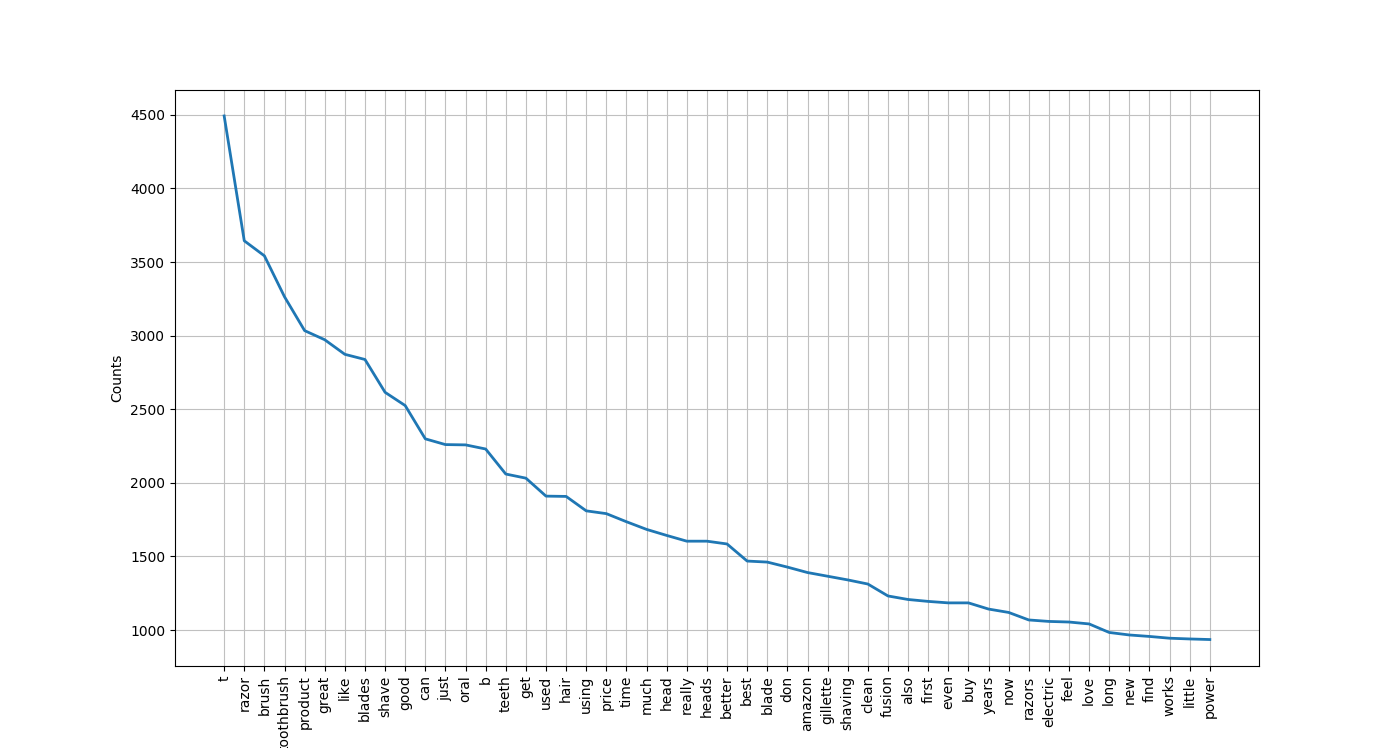

In [7]:
Image(filename='50_most_commun_words.png')

### Figure 4.4 Word Count without t and b

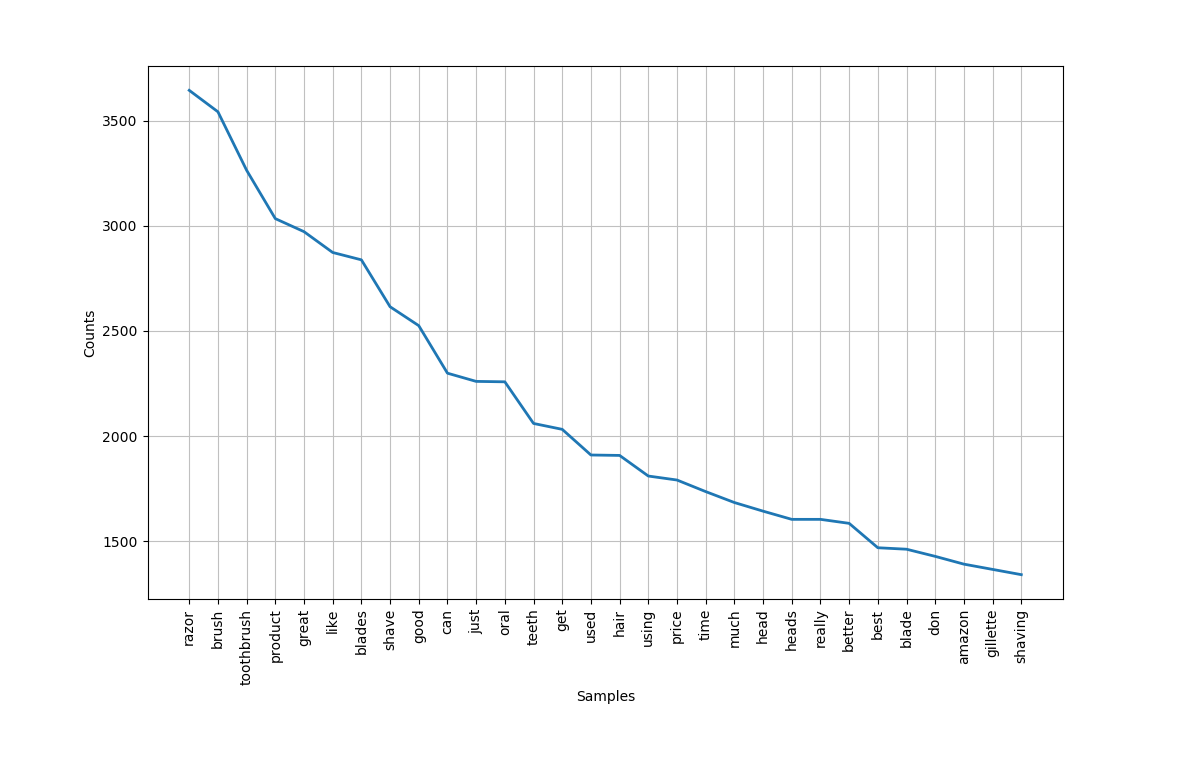

In [8]:
Image(filename='30_most_commun_words.png')

## 5. Data Cleaning
In order to work with our data, we had to convert words into computer recognizable values, which meant that we had to preprocess our data for optimal performance. The way in which we processed our data varied slightly between our base and final model, the reasons for which have been elucidated below.
 
1. We combine our data using two methods. The first method is an overall concatenation of all five data sets. In the second method we concatenate four out of the five datasets leaving out one product for reasons explained in part 5.
2. Extract label and review : our primary interest in is in the review column and its associated user assigned user rating.
3. Remove non letters: this includes html, punctuation, and other non relevant symbols. We do this because we’re only interested in the words themselves.
4. Lowercase all words: By convention. This allows us to normalize the words.
5. Train/Test set: We have two methods to derive our train/test sets. In the first method we use the dataset with all the concatenated datasets and randomly divide ⅔ of our data into a training set to fit our model, and ⅓ into a test set to assess its accuracy. In the second method we use the data with a product left out, where the four concatenated data sets make up our training set, and the product that’s been left out is our test set.
6. Remove stop words: We filter out high frequency words that do not carry much discriminating information. The words were provided under “stop_words.txt”. We decided to remove the stop words since we’re not taking a weighted average.
7. Tokenize: Here we tokenize using a function derived from the nltk library.

 
Our code is implemented as follows


## 5. Vectorization: Bag of Words & Word2Vec

To convert the words in numerical vectors, we explore two methods: Bag of Words and Word2Vec. 
 
The bag of words model is a way of transforming the textual data in numerical form. The idea is to count each occurrence of a given word in our dictionary for a given review, where each row corresponds to a review. So if we have a vector of the form [0,3,4,1,0…], every position in the vector corresponds to a specific word and enumerates the number of times the word is present in the text. These vectors are often sparse because it could be the case that texts on the same topic may not necessarily use all the words in our dictionary. This method, however, is effective in extracting the main features, or words, that link a review with its rating. 
 
The Word2Vec method uses a neural network to transform textual data into numerical form. It turns text corpora into vectors that are positioned in such a way that words that share a context are closer in space. We use pre-trained vectors that Google trained on 100 billion words. This gives us a library of words with corresponding vectors. To obtain a final vector for each review, we looked up the vector for each word in the review, summed up the respective vectors then took an average yielding a single review. Given that this was not a weighted average, we chose to remove the stop words in order to remove noise. 
 
As part of our model assessment, we applied both vectorization methods to identify the best model.   


## 5. Model Assessment

As stated above, we’ve used two separate vectorization techniques and we’re going to implement the following multi-class classification models: Naive Bayes, Decision Trees, Stochastic Gradient Descent, Random Forest, and Feedforward Neural Network. In each of these cases, we take all the data sets to fit our model - split into a training set and a test set. Please note that their implementations have been provided as both separate python files and has been annotated in the appendix. Their results are as follows:



### 5a. Naive Bayes

Naive Bayes uses Bayes’ theorem to assign a class label to a sample based on its conditional probability class given its features. The underlying assumption is that the features are all independent, which is an unrealistic assumption in our case given that it makes little sense that textual data features are independent of each other. We used multinomial Naïve Bayes algorithm from the Scikit-learn library. The implementation can be found in the appendix.
 
For the Bag of Words method the model has an accuracy rate of 63%, which is quite high considering the independence assumption. The precision, which is the ratio of true positives to false positives, is about 75% for the five star class. This makes sense given the proportion of reviews labeled 5 in our dataset. The second-best precision score at around 61% is the one star class, and is, incidentally, the second most populated category. Classes 2, 3, and 4 are not well predicted by our model.
 
Finally, the F1-score is the harmonic mean of precision and recall metrics this usually used to measure the quality of a classification algorithm. (Hardeniya and al. Natural Language Processing (2016), Packt>).

We were unable to implement Naive Bayes with a Word2Vec vectorization. We received a warning that stated that our vector contained negative values and that Naives Bayes cannot take in negative values. 

Please see Figure 5.1 for a heat map of our data.

### 5b. Decision Trees

Next we explore the decision tree algorithm. This classification technique aims to link a set of features to a specific class by building a logic tree.  The version implemented in the Scikit-learn library is the CART algorithm to construct binary decision trees. The tree tries to get the best split to differentiate observations based on the features once a split is made the same process is applied in the next node. The procedure stops when the algorithm detects that there are no further gain is to be made. The implementation can be found in the appendix.
 
In the bag of words context, the results are slightly worse than the Naïve Bayes ones we got before. The overall accuracy rate is of 59.2%. Once again the class of 5’s are the ones best classified (F1: 71%) by the algorithm followed by the class of 1’s (F1: 48%), and the classes 2,3 and 4 are poorly predicted by our model, for the same reasons stated above. The four star class classifies significantly worse than the one star category despite having more support. We will revisit the reason for this later. (Figure 5.2)

Word2Vec yields similar, but worse results in each category with an overall accuracy rate of 42.8%.  Class 5 loses 9% accuracy (F1: 62%) and class 1 more than 50% less accurate this time around (F1:23%). This seems counterintuitive given that word2vec’s review vector is the average of the sum of the individual vectors of each word. Since each word is a 200 feature vector one would think this procedure would keep more information. This isn’t the case here or in any of the others classifier. (Figure 5.3)


### 5c. Stochastic Gradient Descent

The Stochastic gradient descent (SGD) is an approach to define a linear classifier for the data. We still use the Scikit-learn library to implement this procedure. Usually SDG perform well with datasets with a lot of features.  The implementation can be found in the annex XXX.
The Bag of Words model is consistent with what we have seen so far. The overall accuracy rate is of 59.8%. The result for class 5 is the best (F1: 77%) followed by class 1 (F1: 56%), with classes 2, 3, and 4 being poorly classified. (Figure 5.4)

As for the word2vec dataset we get an overall accuracy rate of 57.2%. Class 5 does the best with (F1: 73%) followed by class 1 (F1: 49%). The particularity here is that the classifier is unable to classify the class 3 at all. (Figure 5.5)

### 5d. Random Forest

The random forest is a classifier that fits 100 decision tree classifiers on subsamples of the dataset and its aim is to get the best set of features to discriminate the data. It is currently one of the best performing algorithms for general classification problems. We implement the code in the appendix.
The bag of words implementation has an overall accuracy rate of 63.5%. The classification report follows the pattern above with where class 5 is the best discriminated (F1: 77%) with class 1 in second place (F1: 55%) (Figure 5.6)

In the word2vec setting the accuracy rate is of 57.7%. The classification of class 5 again performs the best (F1: 73%). Here classes 1 to 4 aren’t correctly classified and have very low scores. (Figure 5.7)


### 5e. Feedforward Neural Network

Our final model is a simple feedforward neural network with two hidden layers implemented with the Keras library. Given that we are classifying our reviews into one of five classes, using softmax as the activation function of the output layer seems to be the most appropriate choice. For the hidden layers we choose to implement the reLU activation function. There are two fundamental benefits to ReLU, the first is a reduced likelihood of a vanishing gradient problem, and the second and is sparsity. 
 
In the Word2Vec environment, the FNN had an average accuracy rate of 61.7%. The Bag of Words performed significantly worse with an average accuracy rate of 48.6%



### 6. Baseline Model

Out of the models assessed above, we’ve found that the Naive Bayes method performs extremely well, and given its simplicity, we’ve chosen to use it as our baseline model. 

### 7. Final Model

The Feedfoward Neural Network is more complex than the Naive Bayes, is nonlinear, and does not require an independence assumption. We will compare the performance of this model against our Naive Bayes model, our baseline. The Word2Vec version of the model far outperforms that of the Bag of Words model, and we are therefore going to vectorize using Word2Vec in the final model.

## 8. Conclusion
In this section, we'll discuss the McNemar test of significance, our limitations, and conclude with a general discussion of our results. 

### 8a. McNemar Significance
We implement the McNemar significance test on the Word2Vec vectorized version of the Feedforward Neural Network with the Naive Bayes model as our baseline. 




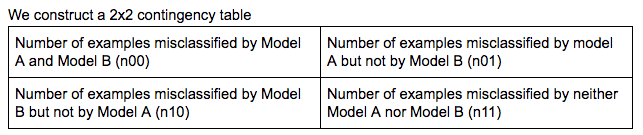

In [2]:
from IPython.display import Image

# Figure 4.1 Summary Statistics
Image(filename='Screen Shot 2017-06-16 at 1.23.27 AM.png')


Under the null hypothesis, the two algorithms should have the same error rate where n10 = n01.
Using a chi-square goodness of fit test, we can compare the distribution of counts. 
 
We find that the p-value is equal to 0.00 which means that reject our null hypothesis that the misclassification rate of our NB is equal to the misclassification rate of our FNN. We therefore conclude that there is a significant difference between the missclassification rate of the two models, and that Naive Bayes significantly outperformed our Feedforward Neural Network model. 


### 8b. Limitations

One of the major limitations we faced was that our dataset was relatively small. Having a Word2Vec pretrained on a billion words certainly helped with these limitations, but as a general rule, smaller datasets limit the amount contextual information available which is crucial in tasks such as sentiment analysis. 
 
Another limitation we faced was that our dataset had an overwhelming proportion of ratings equal to five. We also usually had more ratings in class 1 than classes 2, 3, and 4. We considered methods such as upsampling, but given our already small dataset, we didn’t want to cloud our data with noise, nor did we want to place significance on terms that are otherwise irrelevant, but become relevant because we augment its presence in the dataset. Truncation would also have been an option, but again, we were worried about our already too small dataset. 

### 8c. Discussion
Much to our surprise, we found that Naive Bayes outperformed our neural network. Research has shown that Naive Bayes' generally works pretty well with small amounts of training data, and it could be the case here that our neural network simply did not have enough training data. Naive bayes' is primarily advantageous in that it's simple to implement and does a good job handling a large number of features. Our primary reason for favoring a FNN in the first place is because of its underlying assumptions and its ability to handle complexity. 

Clearly FNNs would run as the baseline for more sophisticated models such as Convolutional Neural Networks and Recurrent Neural Networks that have been successfully implemented in sentiment analysis exercises. We opted out of these more complex options because we believed such methods would be overkill for a dataset as small as ours, and would be prone to overfitting. 

What surprised us the most was the fact the word2vec systematically yielded worse results than bag of words except in the case of the FNN. We fail to understand why given the fact that the point of the technique is to retain more contextual information when vectorizing words.

One possible extension we thought of was to reduce the number of possible outcomes where rather than having five classes, we merged classes 4 and 5 as well as 1 to 3 to get a binary classification problem. Upon implementation we did find that it boosted accuracy levels of all classifiers. Our Naive Bayes classifier scores had a accuracy rate of 82.9% and our FNN an accuracy rate of 74.9%. It is worth noting that with this method, Stochastic Gradient Descent actually performed the best with 84.5% accuracy in the Bag of Words setting. 


## 9. Appendix

###Appendix 2.1 Code used to clean data

In [ ]:
import pandas as pd

always = pd.read_csv("reviews_always.csv", sep='\t', header=0)  # ok
gillette = pd.read_csv("reviews_gillette.csv", sep='\t', header=0)  # ok
oral = pd.read_csv("reviews_oral-b.csv",sep='\t', header=0,encoding='cp850')
pantene = pd.read_csv("reviews_pantene.csv", sep='\t', header=0)  # ok
tampax = pd.read_csv("reviews_tampax.csv", sep='\t', header=0)  # ok
stop = pd.read_table("stop_words.txt",header = None)
stop = set(stop[0])


## Always
always['review'] = always['title'] + ' ' + always['review']  # made one
always['review'] = always['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)  # Only words
always['review'] = always['review'].str.lower()  # Lower case
#always['review'] = always['review'].str.split()  # split
#always['review'] = always['review'].apply(lambda x: [item for item in x if item not in stop])  # take out stop words

al2 = always[['user_rating', 'review']]
al2.to_csv('always_clean.csv', sep='\t', encoding='utf-8')

## gillette
gillette['review'] = gillette['title'] + ' ' + gillette['review']
gillette['review'] = gillette['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
gillette['review'] = gillette['review'].str.lower()
#gillette['review'] = gillette['review'].str.split()
#gillette['review'] = gillette['review'].apply(lambda x: [item for item in x if item not in stop])

g2 = gillette[['user_rating', 'review']]
g2.to_csv('gillette_clean.csv', sep='\t', encoding='utf-8')

## pantene
pantene['review'] = pantene['title'] + ' ' + pantene['review']
pantene['review'] = pantene['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
pantene['review'] = pantene['review'].str.lower()
#pantene['review'] = pantene['review'].str.split()
#pantene['review'] = pantene['review'].apply(lambda x: [item for item in x if item not in stop])

p2 = pantene[['user_rating', 'review']]
p2.to_csv('pantene_clean.csv', sep='\t', encoding='utf-8')

##tampax
tampax['review'] = tampax['title'] + ' ' + tampax['review']
tampax['review'] = tampax['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
tampax['review'] = tampax['review'].str.lower()
#tampax['review'] = tampax['review'].str.split()
#tampax['review'] = tampax['review'].apply(lambda x: [item for item in x if item not in stop])

t2 = tampax[['user_rating', 'review']]
t2.to_csv('tampax_clean.csv', sep='\t', encoding='utf-8')

##oral
oral['review'] = oral['title'] + ' ' + oral['review']
oral['review'] = oral['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
oral['review'] = oral['review'].str.lower()
#oral['review'] = oral['review'].str.split()
#oral['review'] = oral['review'].apply(lambda x: [item for item in x if item not in stop])

o2 = oral[['user_rating', 'review']]
o2.to_csv('oral_clean.csv', sep='\t', encoding='utf-8')

# list the files
filelist = ['always_clean.csv', 'gillette_clean.csv', 'pantene_clean.csv', 'tampax_clean.csv','oral_clean.csv']


# read them into pandas
df_list = [pd.read_csv(file, sep='\t', header=0) for file in filelist]
# concatenate them together
big_df = pd.concat(df_list)


big_df.to_csv('Data_clean.csv', sep='\t', encoding='utf-8')


# From the big data set we randomly select a Training set of 75% and a Test set of 25%.
train_labels = []
train_text = []
data = pd.read_csv('Data_clean.csv', sep='\t', header=0)
df_clean = pd.DataFrame({
    "Rate": data.user_rating,
    "Review": data.review})

train = df_clean.sample(frac=0.75,
                        random_state=1)  # Fraction of axis items to return  random_state->Seed for the random number generator
test = df_clean.drop(train.index)

train.to_csv('train.csv', sep='\t', encoding='utf-8')
test.to_csv('test.csv', sep='\t', encoding='utf-8')

### Figure 4.1 Summary Statistics

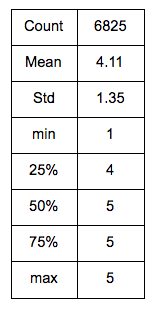

In [3]:
from IPython.display import Image

Image(filename='Screen Shot 2017-06-15 at 11.54.36 PM.png')

###Figure 4.5 ALWAYS

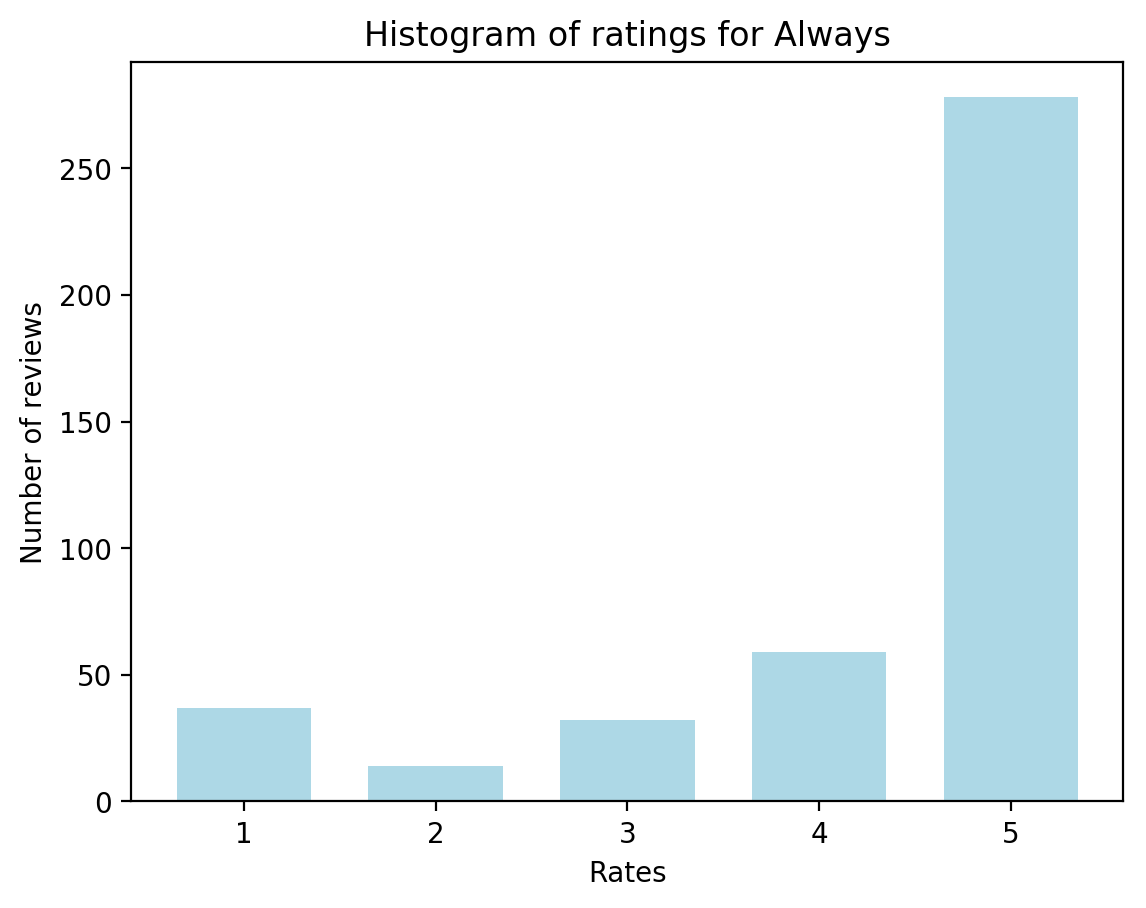

In [31]:
Image(filename='Explore_always.png')

###Figure 4.6 GILETTE

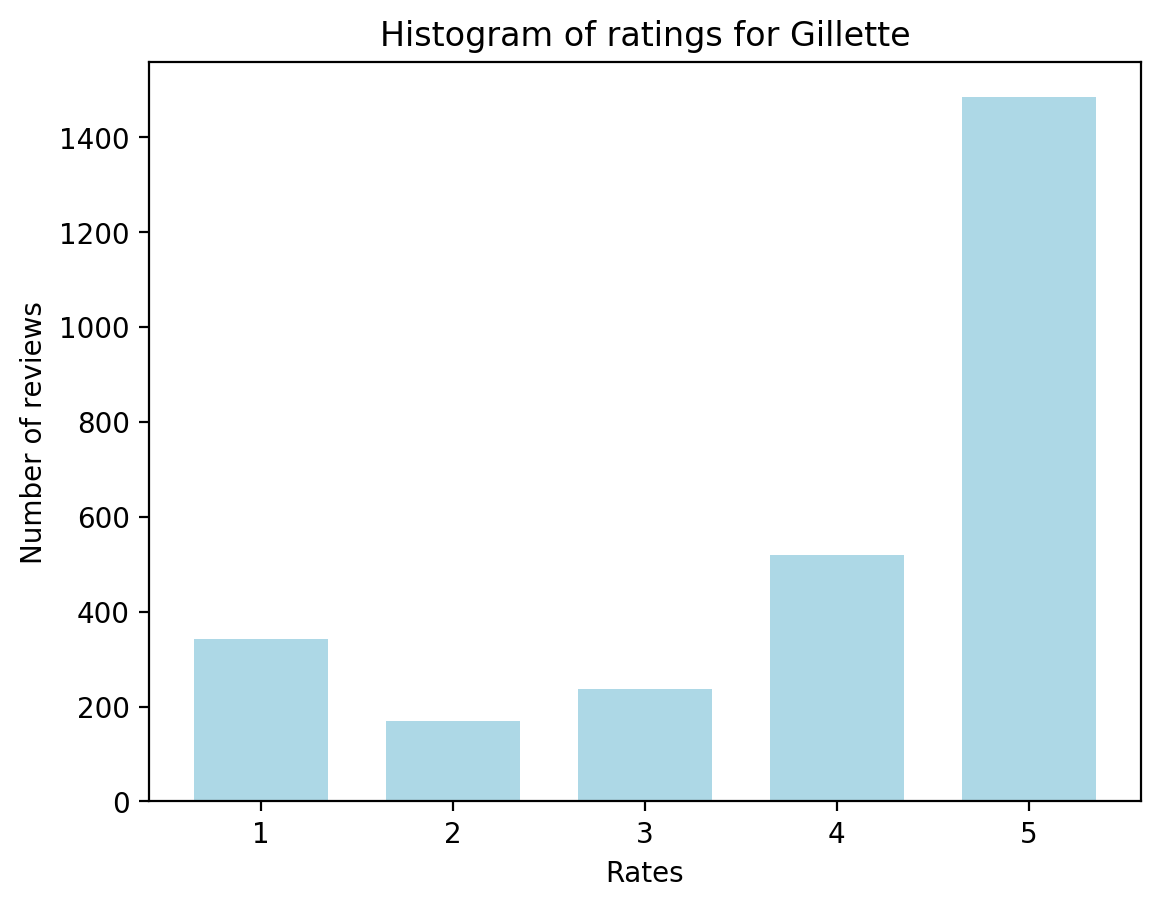

In [32]:
Image(filename='Explore_gillette.png')

###Figure 4.7 ORAL-B


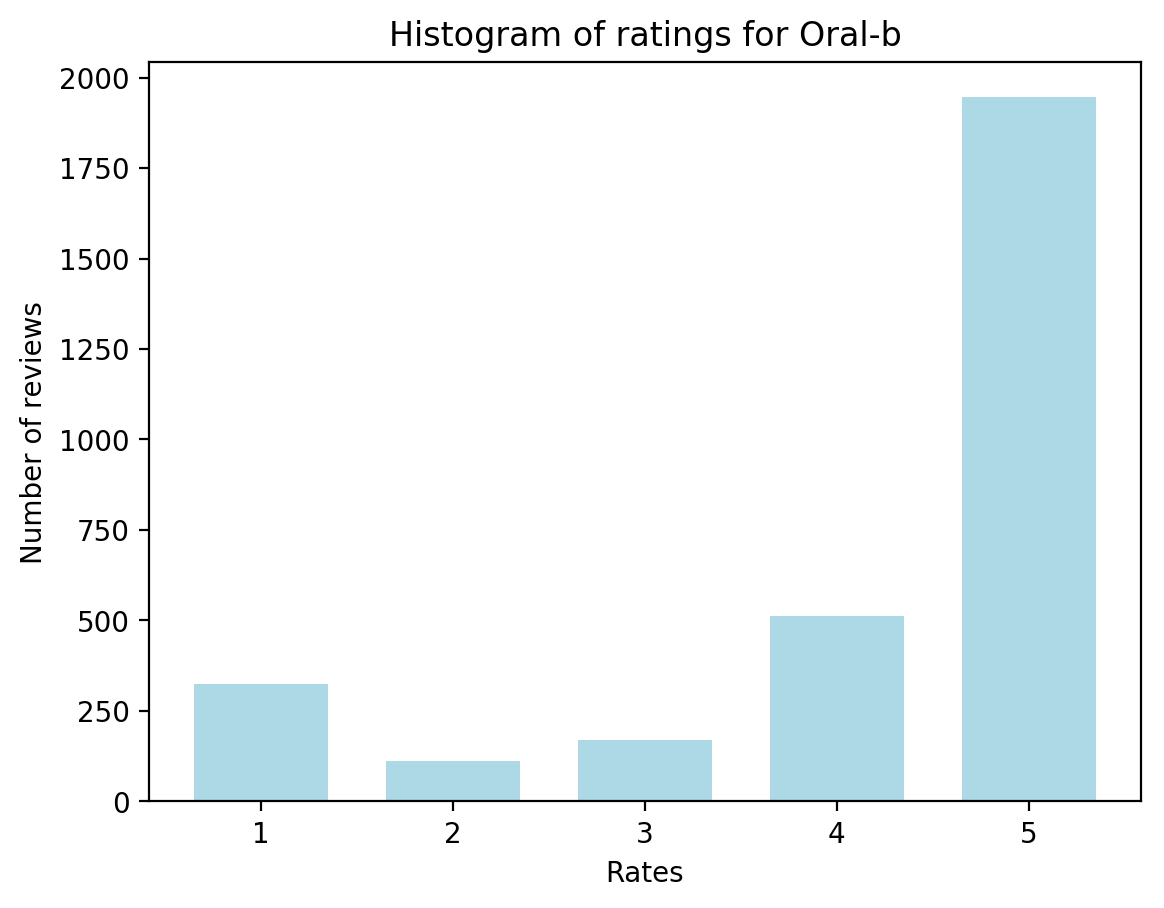

In [33]:
Image(filename='Explore_oral.png')

###Figure 4.8 PANTENE

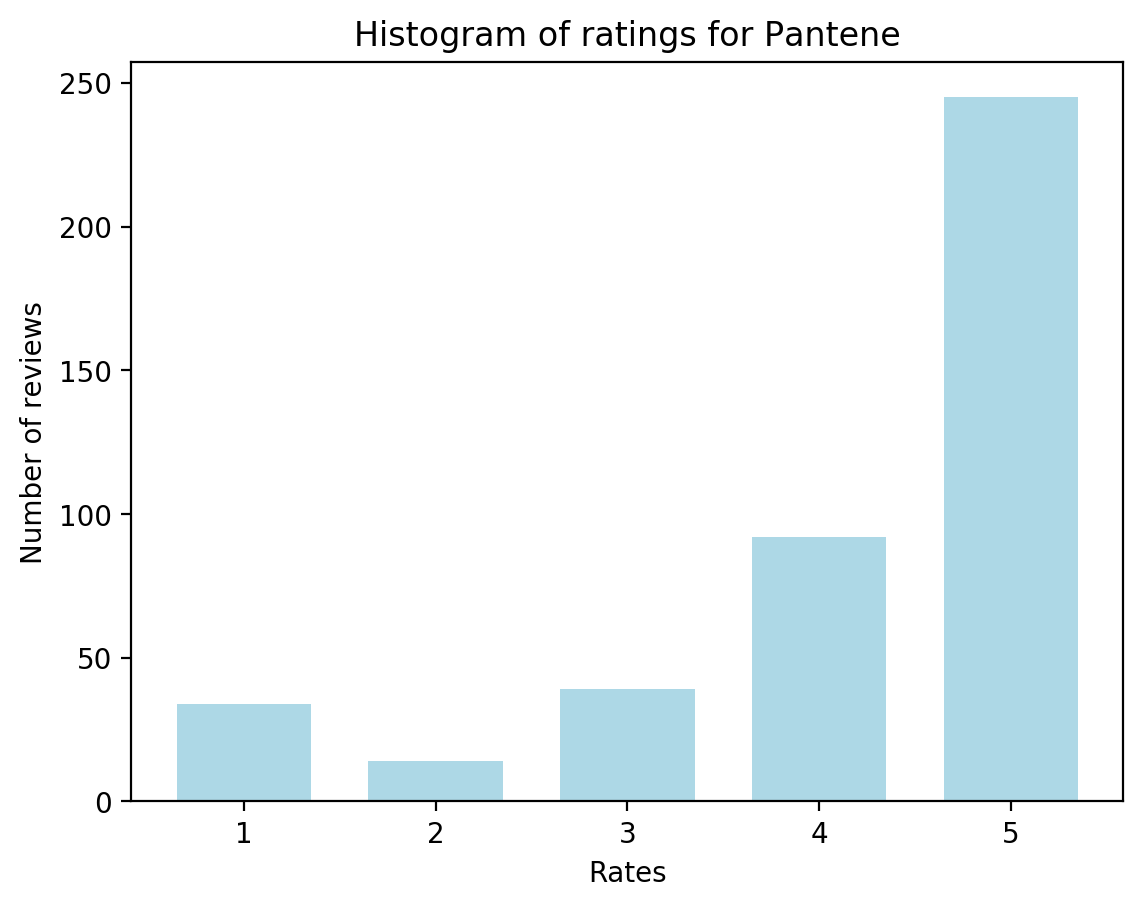

In [34]:
Image(filename='Explore_pantene.png')

###Figure 4.9 TAMPAX


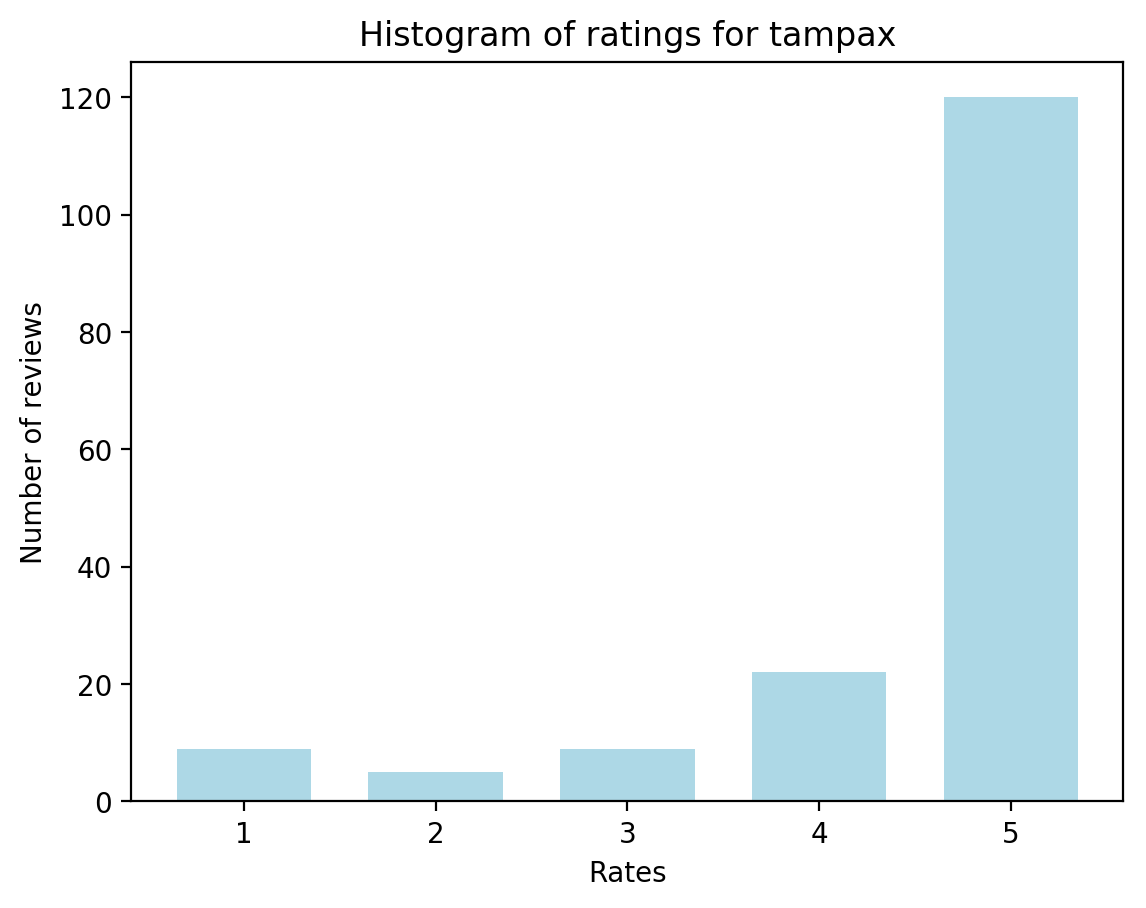

In [35]:
Image(filename='Explore_tampax.png')

### Figure 5.1 Naive Bayes

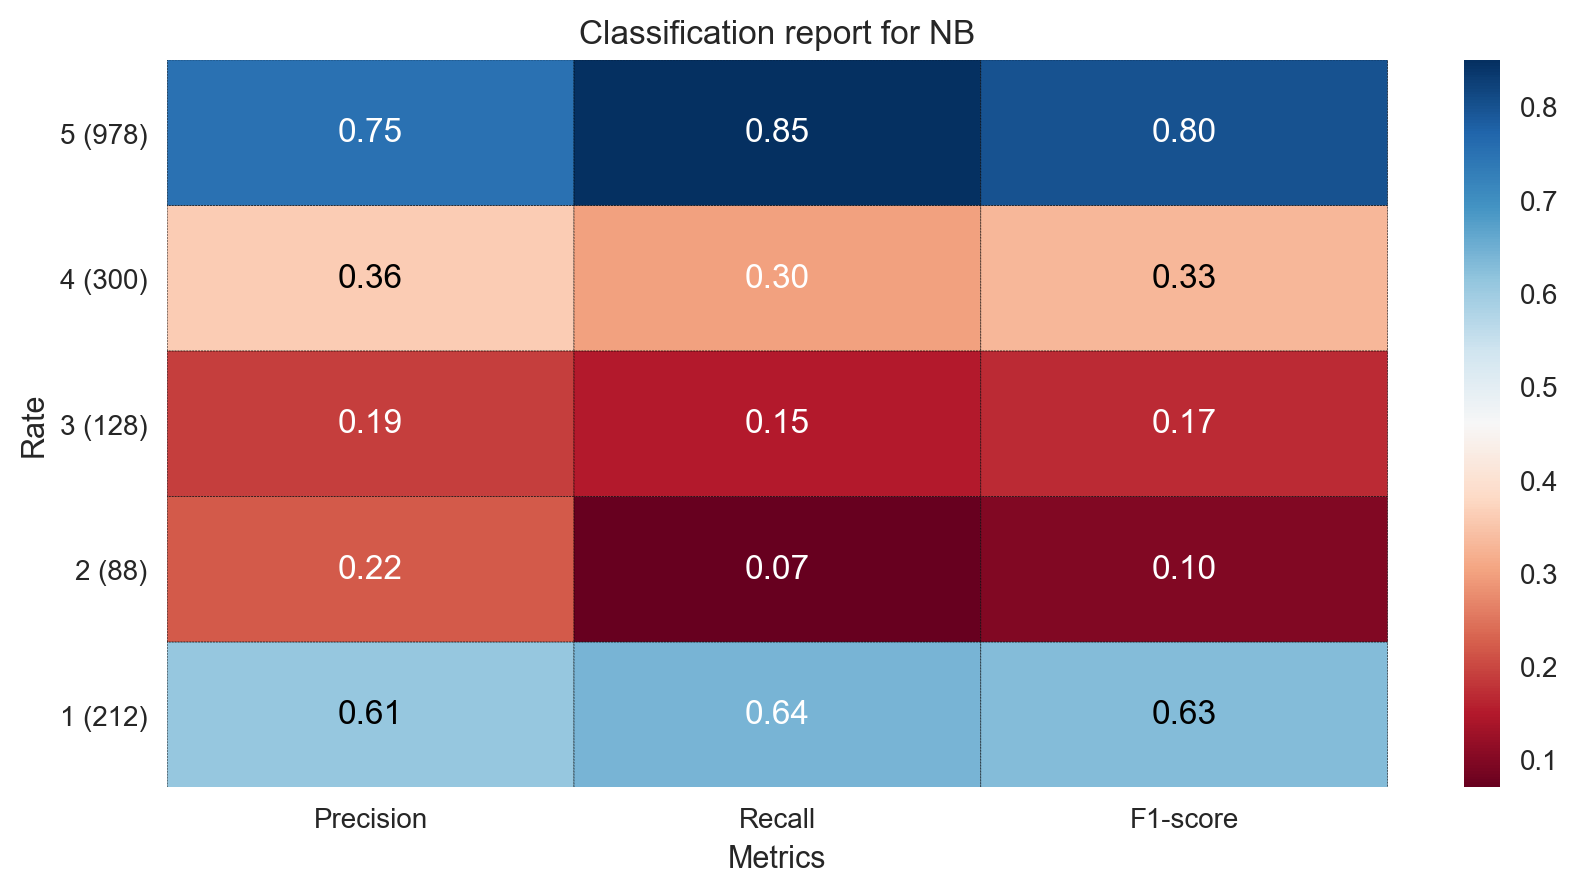

In [36]:
Image(filename='NaiveBayes_classif_report.png')

###Appendix 5.1 Naive Bayes Implementation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from decimal import Decimal
import matplotlib.pyplot as plt
from Functions import show_values,cm2inch,heatmap,plot_classification_report

stop = pd.read_table("stop_words.txt",header = None)
stop = set(stop[0])


# Individualize the words and takes out stopwords

vectorizer = CountVectorizer(analyzer="word",
                             tokenizer= None,
                             preprocessor=None,
                             stop_words=stop,
                             max_features=5000)


#Import and format the reviews in sparse vectors
train = pd.read_csv("train.csv", sep='\t', header=0)
clean_train_reviews = train.Review
test = pd.read_csv("test.csv", header=0, delimiter="\t")
clean_test_reviews = test.Review

train_data_features = vectorizer.fit_transform(clean_train_reviews)
test_data_features = vectorizer.transform(clean_test_reviews)



#--- Modeling
# classifier Trained on training-set
clf = MultinomialNB().fit(train_data_features, train["Rate"])

# classifier Predicts classes for test-set
class_nb_predicted = clf.predict(test_data_features)

class_names = train.Rate



# Get the statistics
print (' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], class_nb_predicted)
print('plot Conf matrix')

# sn.set(font_scale=1.4)#for label size
# sn.heatmap(cm, annot=True,annot_kws={"size": 16},fmt="d",xticklabels =[1,2,3,4,5] ,yticklabels= [1,2,3,4,5])




acc = Decimal(accuracy_score(test["Rate"], class_nb_predicted))
acc = Decimal(acc.quantize(Decimal('.01')))
acc = acc*100
print("Our Naive Bayes classifier has a accuracy rate of :", acc, "%")



plot_classification_report(classification_report(test["Rate"], class_nb_predicted),title='Classification report for NB')
plt.savefig('NaiveBayes_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": class_nb_predicted, "True_val": test["Rate"]})
output.to_csv("Naive Bayes.csv", index=False, sep='\t')

### Figure 5.2 Decision Tree Bag of Words


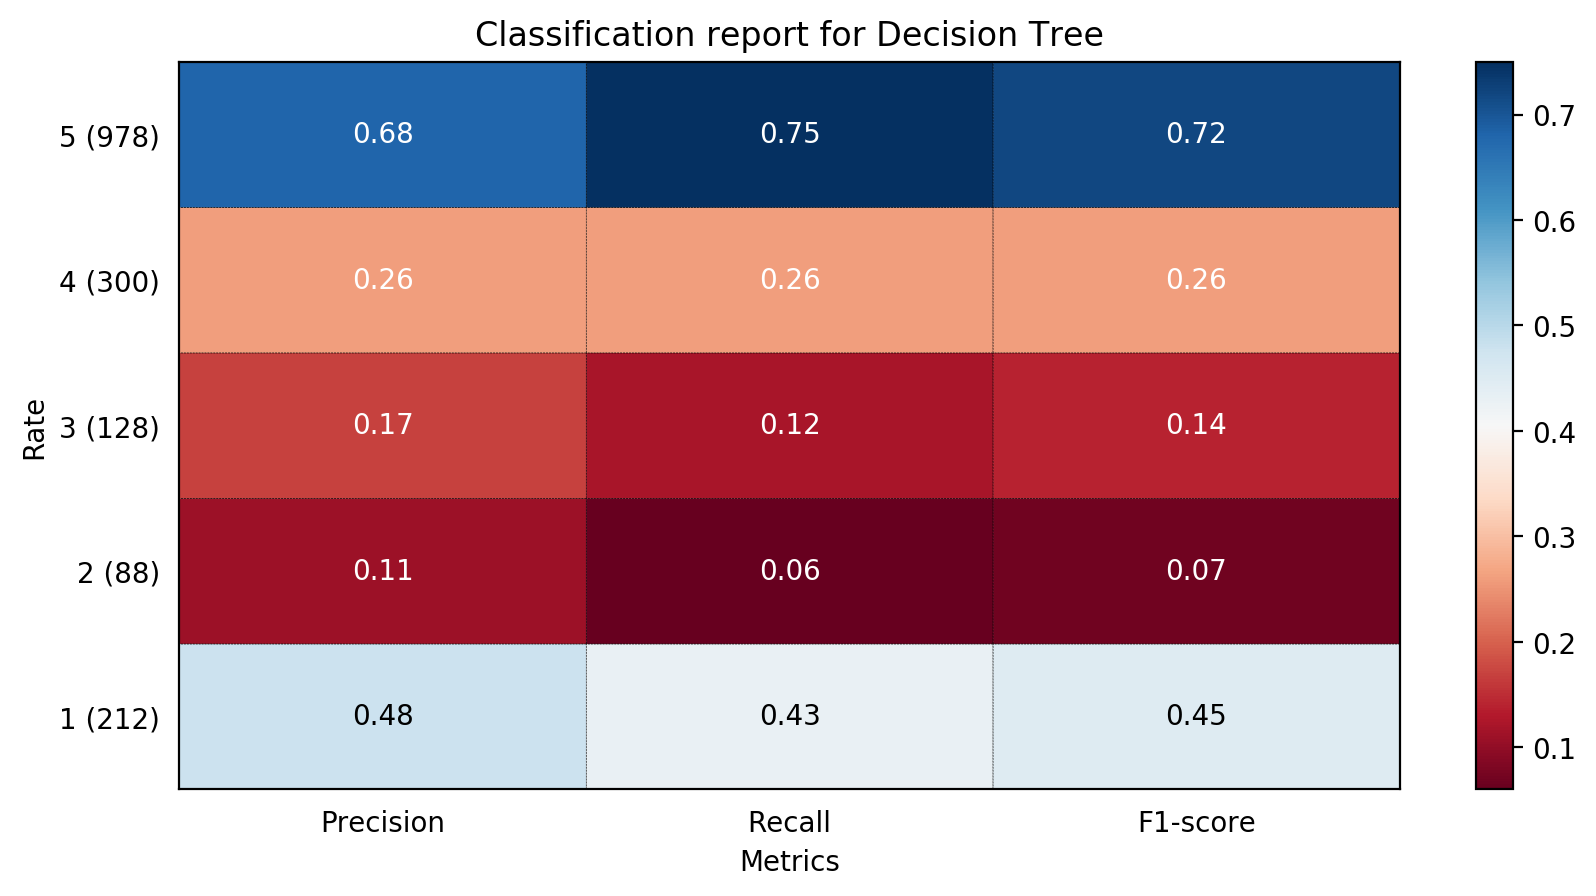

In [14]:
Image(filename='Decision_tree_classif_report.png')

###Appendix 5.2 Decision Tree Bag of Words

In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
from Functions import show_values,cm2inch,heatmap,plot_classification_report
stop = pd.read_table("stop_words.txt",header = None)
stop = set(stop[0])

vectorizer = CountVectorizer(analyzer="word",
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=stop,
                             max_features=5000)

train = pd.read_csv("train.csv", sep='\t', header=0)
clean_train_reviews = train.Review
train_data_features = vectorizer.fit_transform(clean_train_reviews)

test = pd.read_csv("test.csv", header=0, delimiter="\t")
clean_test_reviews = test.Review
test_data_features = vectorizer.transform(clean_test_reviews)


clf = tree.DecisionTreeClassifier().fit(train_data_features.toarray(), train["Rate"])

y_tree_predicted = clf.predict(test_data_features.toarray())
# print (y_tree_predicted)
print(' \n Here is the classification report:')
print(classification_report(test["Rate"], y_tree_predicted))

print(' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], y_tree_predicted)
print(cm)

acc = Decimal(accuracy_score(test["Rate"], y_tree_predicted))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our decision tree classifier has a accuracy rate of :", acc, "%")


plot_classification_report(classification_report(test["Rate"], y_tree_predicted),title='Classification report for Decision Tree')
plt.savefig('Decision_tree_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": y_tree_predicted, "True_val": test["Rate"]})
output.to_csv("Decision Tree.csv", index=False, sep='\t')

### Figure 5.3 Decision Tree Word2Vec


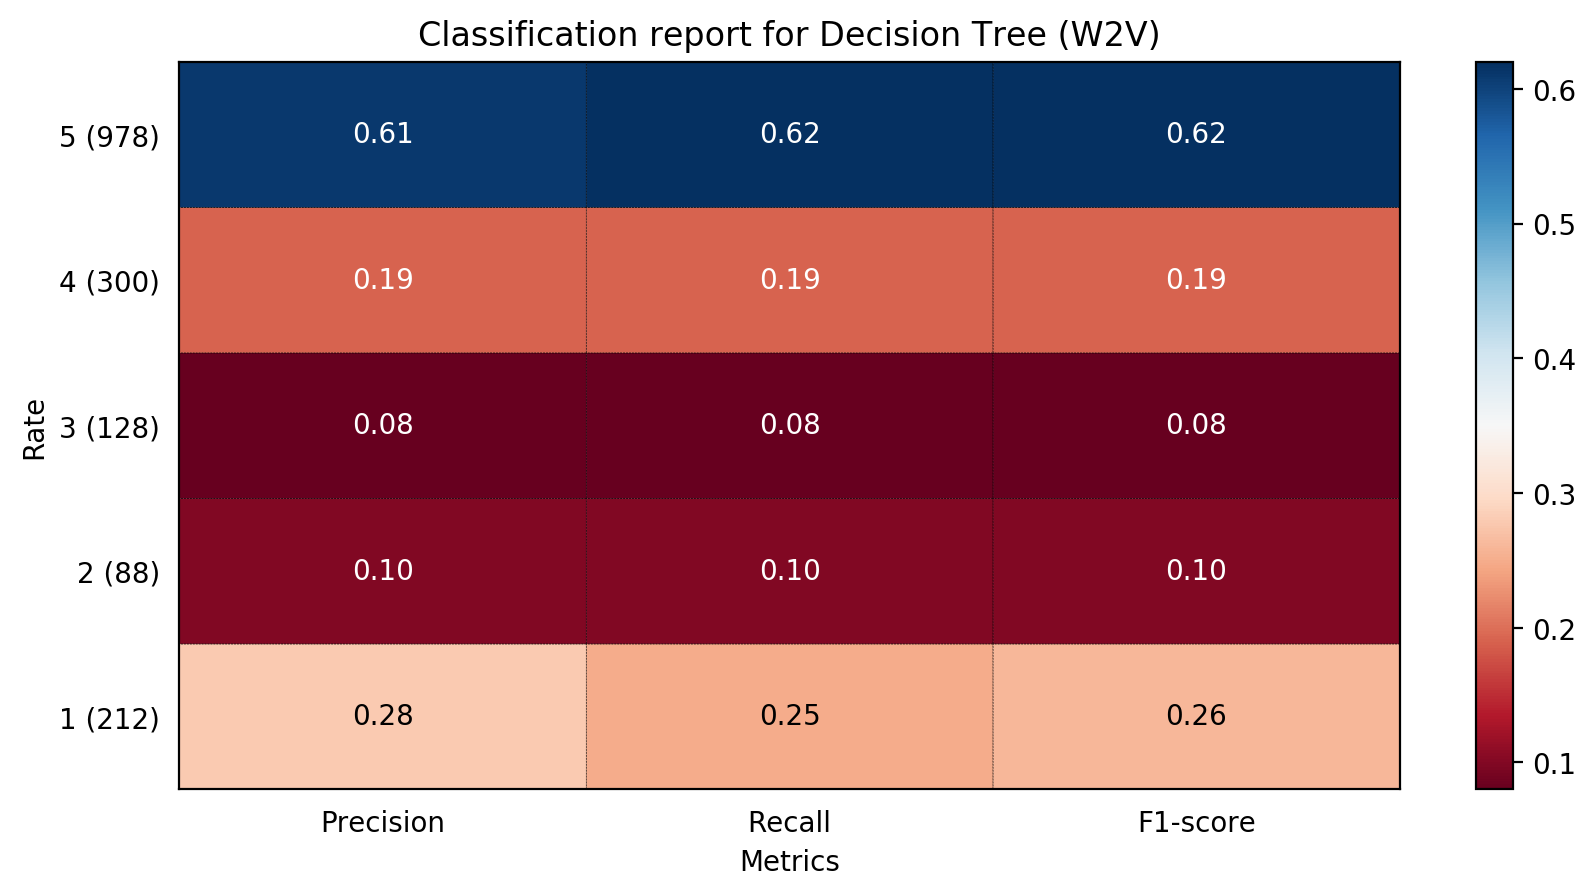

In [15]:
Image(filename='Decision_treeW2V_classif_report.png')

###Appendix 5.3 Decision Tree Word2Vec

In [ ]:
from sklearn import tree
import pandas as pd
from gensim import models
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from decimal import Decimal
import matplotlib.pyplot as plt
from Functions import makeFeatureVec,getAvgFeatureVecs,review_to_wordlist,show_values,cm2inch,heatmap,plot_classification_report

#data Import
train = pd.read_csv("train.csv", sep='\t', header=0)
test = pd.read_csv("test.csv", header=0, delimiter="\t")

#-----Word2Vec-----
# Creates Word2Vec model acts like a look up table to get a numeric vector for each word
print("Loading W2V model")
model = models.KeyedVectors.load_word2vec_format("word2vec.txt", binary=False)
num_features = 200

# individualize the words and takes out stop words and converts the reviews in a stack of vectors
# then averages them to end-up with a single vector
print("Creating average feature vecs for train reviews")
clean_train_reviews = []
for review in train["Review"]:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

print("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["Review"]:
    clean_test_reviews.append(review_to_wordlist(review,remove_stopwords=True))

testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

#--- Modeling
# classifier Trained on training-set
clf = tree.DecisionTreeClassifier().fit(trainDataVecs, train["Rate"])

# classifier Predicts classes for test-set
y_tree_predicted = clf.predict(testDataVecs)



# Get the statistics
print(' \n Here is the classification report:')
print(classification_report(test["Rate"], y_tree_predicted))

print(' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], y_tree_predicted)
print(cm)

acc = Decimal(accuracy_score(test["Rate"], y_tree_predicted))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our decision tree (W2V) classifier has a accuracy rate of :", acc, "%")


plot_classification_report(classification_report(test["Rate"], y_tree_predicted),title='Classification report for Decision Tree (W2V)')
plt.savefig('Decision_treeW2V_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": y_tree_predicted, "True_val": test["Rate"]})
output.to_csv("Decision TreeW2V.csv", index=False, sep='\t')

### Figure 5.4 Stochastic Gradient Descent Bag of Words


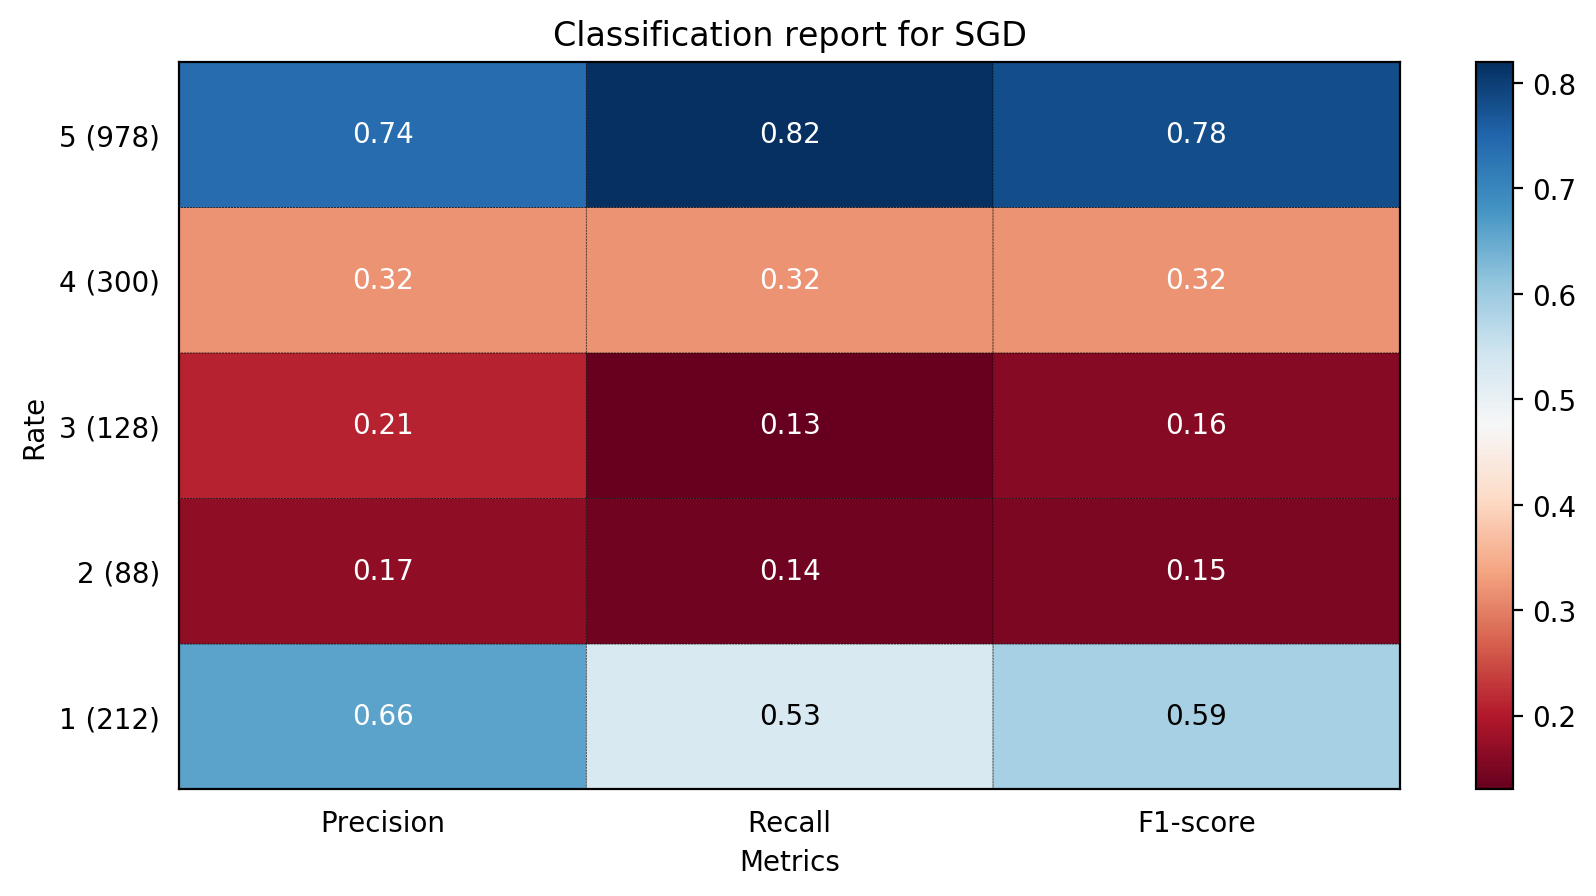

In [16]:
Image(filename='SGD_classif_report.png')

###Appendix 5.4 SGD Bag of Words

In [ ]:
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
from Functions import show_values,cm2inch,heatmap,plot_classification_report


stop = pd.read_table("stop_words.txt",header = None)
stop = set(stop[0])


# Individualize the words and takes out stopwords
vectorizer = CountVectorizer(analyzer="word",
                             tokenizer= None,
                             preprocessor=None,
                             stop_words=stop,
                             max_features=5000)

#Import and format the reviews in sparse vectors
train = pd.read_csv("train.csv", sep='\t', header=0)
clean_train_reviews = train.Review
train_data_features = vectorizer.fit_transform(clean_train_reviews)

test = pd.read_csv("test.csv", header=0, delimiter="\t")
clean_test_reviews = test.Review
test_data_features = vectorizer.transform(clean_test_reviews)


#--- Modeling
# classifier Trained on training-set
clf = SGDClassifier(alpha=.0001, n_iter=50).fit(train_data_features, train["Rate"])

# classifier Predicts classes for test-set
y_SGD_pred = clf.predict(test_data_features)

# Get the statistics
print(' \n Here is the classification report:')
print(classification_report(test["Rate"], y_SGD_pred))

print(' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], y_SGD_pred)
print(cm)

acc = Decimal(accuracy_score(test["Rate"], y_SGD_pred))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our Stochastic gradient descent classifier has a accuracy rate of :", acc, "%")



plot_classification_report(classification_report(test["Rate"], y_SGD_pred),title='Classification report for SGD')
plt.savefig('SGD_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": y_SGD_pred , "True_val": test["Rate"]})
output.to_csv("SGD.csv", index=False, sep='\t')

### Figure 5.5 Stochastic Gradient Descent W2v


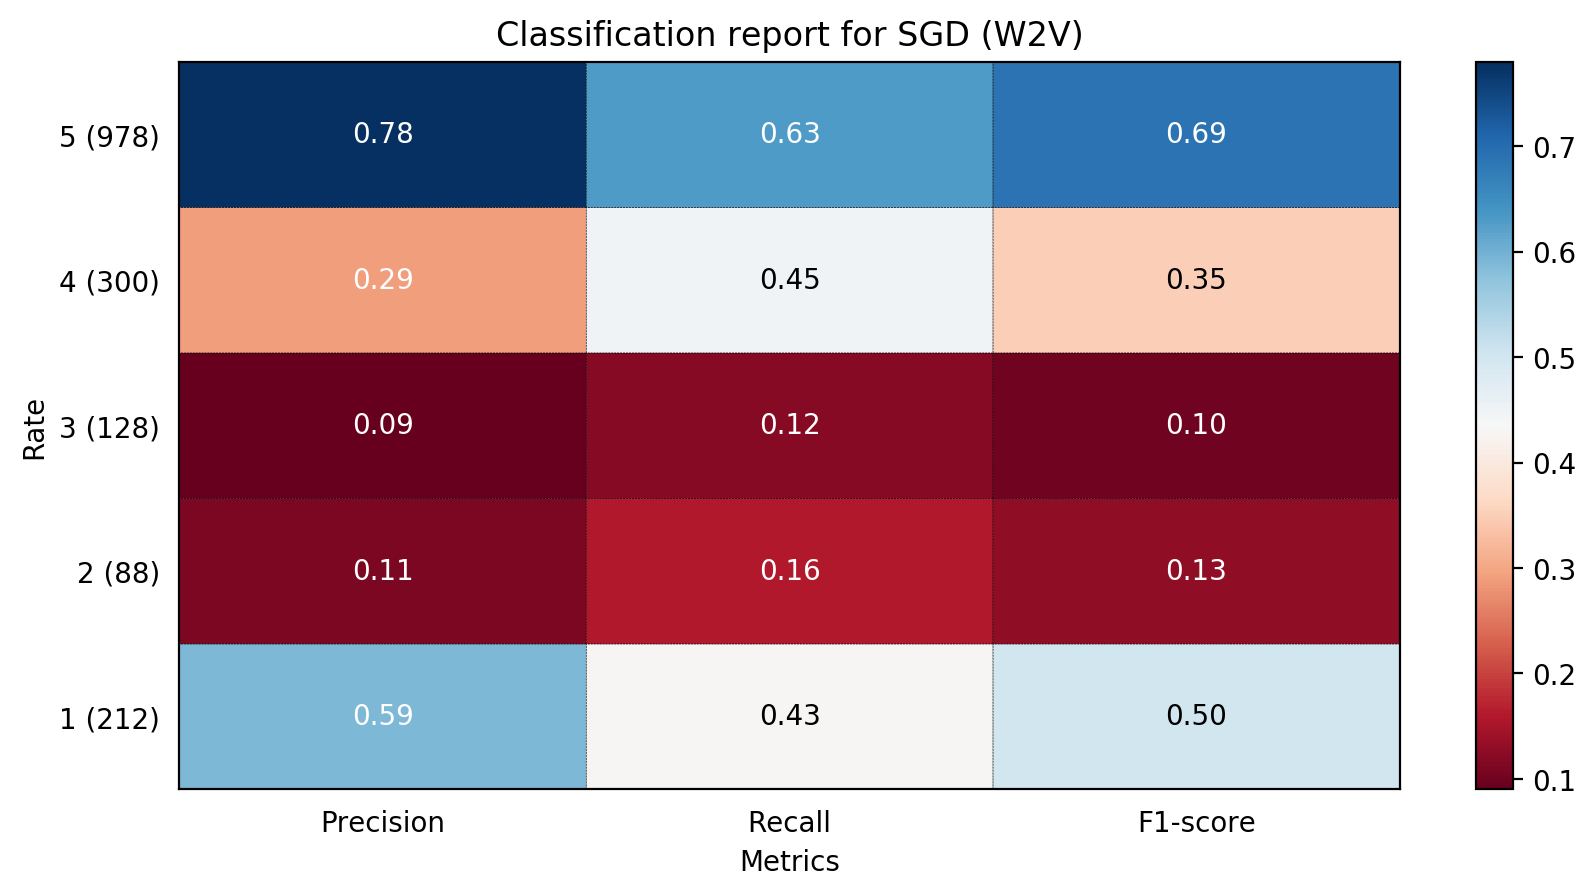

In [17]:
Image(filename='SGDW2V_classif_report.png')

###Appendix 5.5 SGD W2V

In [ ]:
import numpy as np
import pandas as pd
from gensim import models
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from decimal import Decimal
import matplotlib.pyplot as plt
from Functions import makeFeatureVec,getAvgFeatureVecs,review_to_wordlist,show_values,cm2inch,heatmap,plot_classification_report

#data Import
train = pd.read_csv("train.csv", sep='\t', header=0)
test = pd.read_csv("test.csv", header=0, delimiter="\t")

#-----Word2Vec-----
# Creates Word2Vec model acts like a look up table to get a numeric vector for each word
model = models.KeyedVectors.load_word2vec_format("word2vec.txt", binary=False)
num_features = 200

# individualize the words and takes out stop words and converts the reviews in a stack of vectors
# then averages them to end-up with a single vector
clean_train_reviews = []
for review in train["Review"]:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

print("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["Review"]:
    clean_test_reviews.append(review_to_wordlist(review,remove_stopwords=True))

testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)


#--- Modeling
# classifier Trained on training-set
clf = SGDClassifier(alpha=.0001, n_iter=50).fit(trainDataVecs, train["Rate"])

# classifier Predicts classes for test-set
y_SGD_pred = clf.predict(testDataVecs)

# Get the statistics
print(' \n Here is the classification report:')
print(classification_report(test["Rate"], y_SGD_pred))

print(' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], y_SGD_pred)
print(cm)

acc = Decimal(accuracy_score(test["Rate"], y_SGD_pred))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our Stochastic gradient descent (W2V) classifier has a accuracy rate of :", acc, "%")

plot_classification_report(classification_report(test["Rate"], y_SGD_pred),title='Classification report for SGD (W2V)')
plt.savefig('SGDW2V_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": y_SGD_pred , "True_val": test["Rate"]})
output.to_csv("SGD_w2v.csv", index=False, sep='\t')

### Figure 5.6 Random Forest Bag of Words


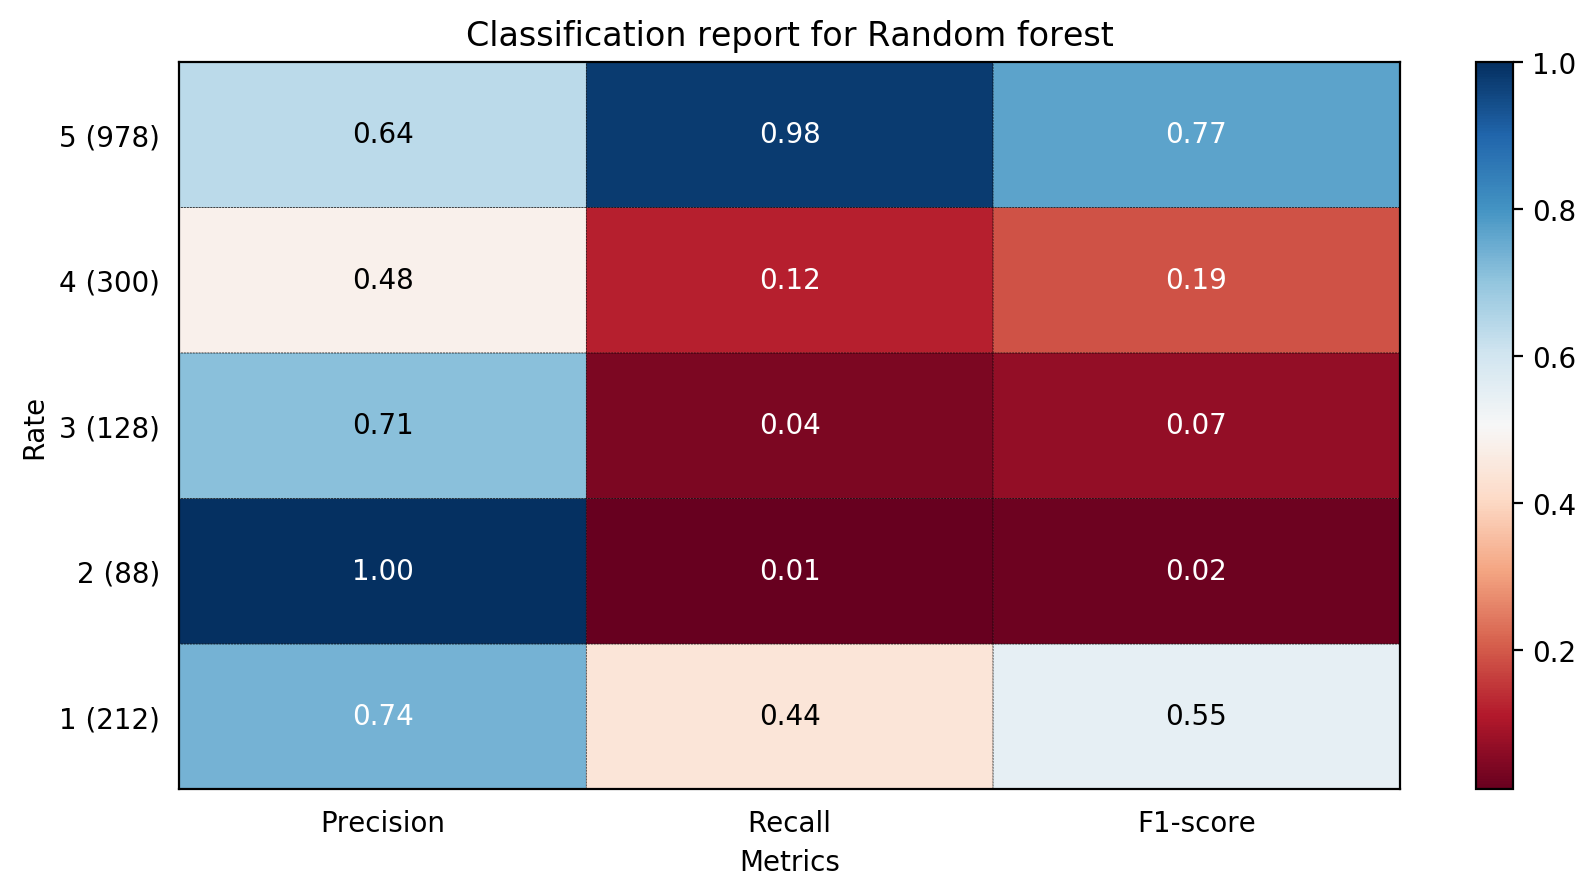

In [18]:
Image(filename='Random_forest_classif_report.png')

###Appendix 5.6 Random Forest Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
from Functions import show_values,cm2inch,heatmap,plot_classification_report



stop = pd.read_table("stop_words.txt",header = None)
stop = set(stop[0])


# Individualize the words and takes out stopwords
vectorizer = CountVectorizer(analyzer="word",
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=stop,
                             max_features=1000)


#Import and format the reviews in sparse vectors
train = pd.read_csv("train.csv", sep='\t', header=0)
clean_train_reviews = train.Review
# Get a bag of words for the train-set, and convert to a numpy array
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()

test = pd.read_csv("test.csv", header=0, delimiter="\t")
clean_test_reviews = test.Review
# Get a bag of words for the test-set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

#--- Modeling
# Random Forest Classifier set-up
forest = RandomForestClassifier(n_estimators=100)

# classifier Trained on training-set
forest = forest.fit(train_data_features, train["Rate"])

# classifier Predicts classes for test-set
output_Predicted = forest.predict(test_data_features)


# Get the statistics
acc = Decimal(accuracy_score(test["Rate"], output_Predicted))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our Random Forest classifier has a accuracy rate of :", acc, "%")

print (' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"],output_Predicted)
print(cm)


plot_classification_report(classification_report(test["Rate"], output_Predicted),title='Classification report for Random forest')
plt.savefig('Random_forest_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={"Id": test["Unnamed: 0"], "Predicted": output_Predicted, "True_val": test["Rate"]})
output.to_csv("Random_forest.csv", index=False, sep='\t')

### Figure 5.7 Random Forest W2v


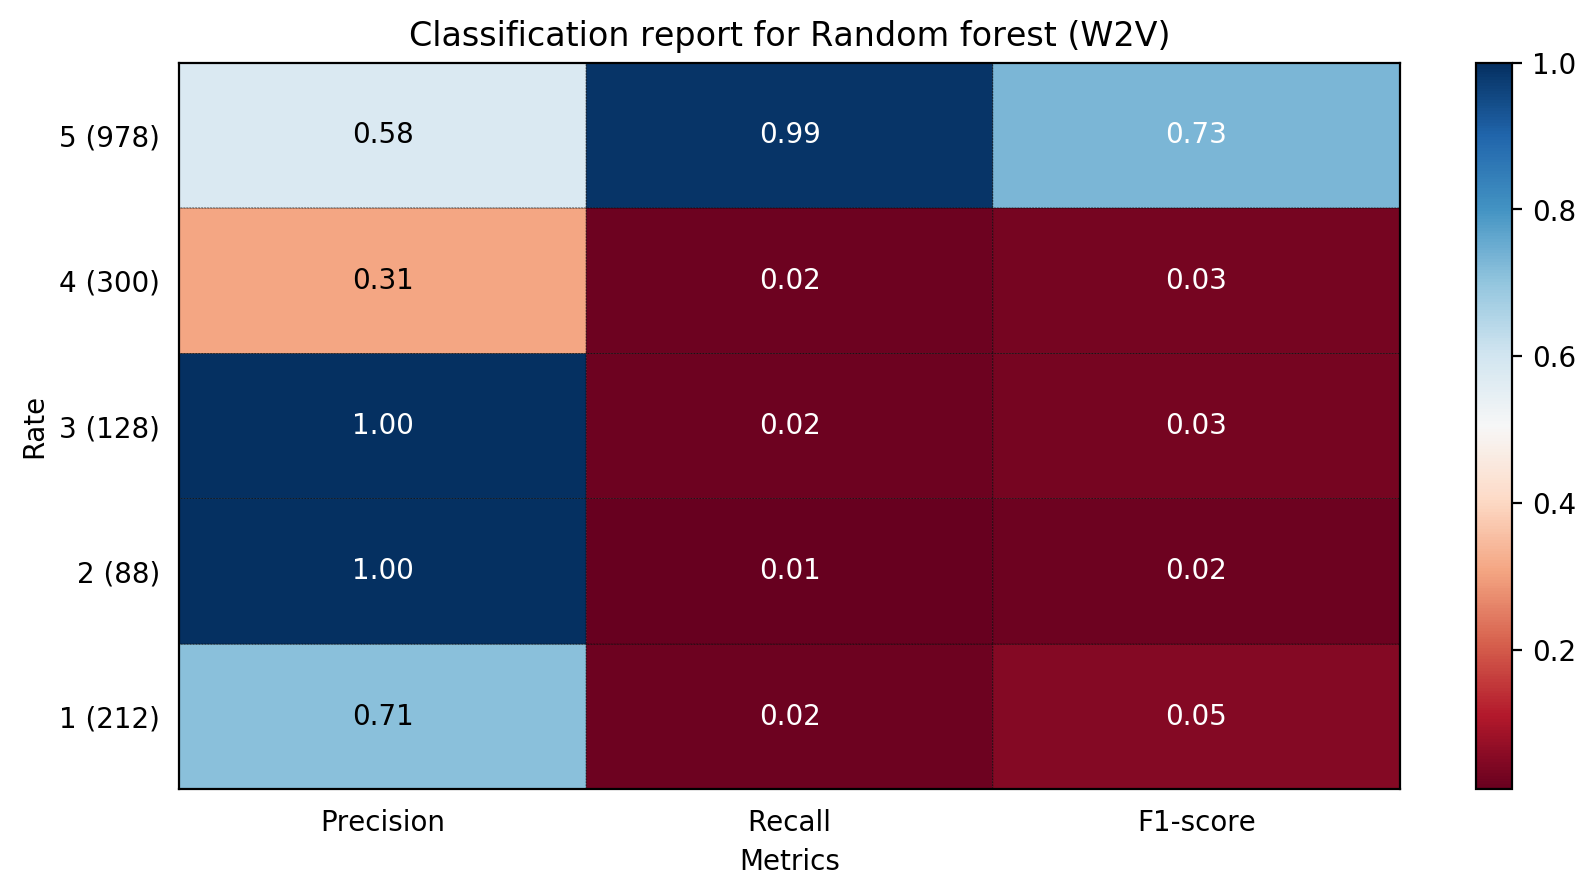

In [11]:
Image(filename='Random_forestW2v_classif_report.png')

###Appendix 5.6 Random Forest Word2Vec

In [ ]:
import pandas as pd
from gensim import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from decimal import Decimal
import matplotlib.pyplot as plt
from Functions import makeFeatureVec,getAvgFeatureVecs,review_to_wordlist,show_values,cm2inch,heatmap,plot_classification_report

#data Import
train = pd.read_csv("train.csv", sep='\t', header=0)
test = pd.read_csv("test.csv", header=0, delimiter="\t")

#-----Word2Vec-----
# Creates Word2Vec model acts like a look up table to get a numeric vector for each word
print('modeliing Word2Vec')
model = models.KeyedVectors.load_word2vec_format("word2vec.txt", binary=False)
num_features = 200

# individualize the words and takes out stop words and converts the reviews in a stack of vectors
# then averages them to end-up with a single vector
clean_train_reviews = []
for review in train["Review"]:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

print("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["Review"]:
    clean_test_reviews.append(review_to_wordlist(review,remove_stopwords=True))

testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)



#--- Modeling
# Random Forest Classifier set-up
forest = RandomForestClassifier(n_estimators=100)

# classifier Trained on training-set
print("Fitting a random forest to labeled training data...")
forest = forest.fit(trainDataVecs, train["Rate"])

# classifier Predicts classes for test-set
y_for_pred = forest.predict(testDataVecs)



# Get the statistics
print(' \n Here is the classification report:')
print(classification_report(test["Rate"], y_for_pred))

print(' \n confusion_matrix \n ')
cm = confusion_matrix(test["Rate"], y_for_pred)
print(cm)

acc = Decimal(accuracy_score(test["Rate"], y_for_pred))
acc = Decimal(acc.quantize(Decimal('.001')))
acc = acc*100
print("Our Random forest (W2V) classifier has a accuracy rate of :", acc, "%")

plot_classification_report(classification_report(test["Rate"], y_for_pred),title='Classification report for Random forest (W2V)')
plt.savefig('Random_forestW2V_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

# Copy the results to a pandas dataframe with an "id" column, a "Predicted" column and a "True_val" column
output = pd.DataFrame(data={'Id': test["Unnamed: 0"], "Predicted": y_for_pred, "True_val": test["Rate"]})
output.to_csv("Random_forestW2V.csv", index=False, sep='\t')

###Appendix 5.7 Feedforward Neural Net Bag of Words

In [ ]:
#-----Process Data-----
import numpy as np
import pandas as pd
import nltk
import keras
import gensim
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import CountVectorizer

#-----Stop Words-----
stop = pd.read_table("stop_words.txt", header = None)
stop = set(stop[0])

#Function to tokenize data
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input: a paragram of text
        output: a list of list of words
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

#-----Process Data-----
def process_data_bow(data, stop_words = stop):
    # -----Extract reviews and labels-----
    # data_label_review = data[['user_rating', 'review']]
    data_label_review = data[['Rate', 'Review']]


    # -----remove non letters-----
    # data_review = data_label_review['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
    data_review = data_label_review['Review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)

    # -----Lowercase-----
    data_review = data_review.str.lower()

    # -----Extract Label-----
    # data_label = data_label_review['user_rating']
    data_label = data_label_review['Rate']


    #-----Count Vectorizer----
    vectorizer = CountVectorizer(analyzer="word",
                                 tokenizer=None,
                                 preprocessor=None,
                                 stop_words=stop_words,
                                 max_features=2985)

    data_features = vectorizer.fit_transform(data_review)
    data_features = data_features.toarray()

    # ------One Hot Vectors train data-----
    data_Y_one_hot_all = keras.utils.np_utils.to_categorical(data_label)
    data_Y_one_hot_bow = data_Y_one_hot_all[:, 1:6]


    return data_features, data_Y_one_hot_bow


def model_net_bow(data, eval, stop_words=stop, epochs=5, batch_size=30, num_features=2985):
    train_data_features, data_Y_one_hot_bow = process_data_bow(data, stop_words)
    eval_data_features, eval_Y_one_hot_bow = process_data_bow(eval, stop_words)

    neural = Sequential()
    neural.add(Dense(64, input_dim=num_features, activation='relu'))  # sigmoid performs signfificantly worse
    neural.add(Dense(32, activation='relu'))
    neural.add(Dense(5, activation='softmax'))
    neural.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    neural.fit(train_data_features, data_Y_one_hot_bow, batch_size, epochs)
    evaluation = neural.evaluate(eval_data_features, eval_Y_one_hot_bow, batch_size)

    predictions_last_epoch = neural.predict(eval_data_features, batch_size=batch_size, verbose=1)
    target_names = ['0', '1', '2', '3', '4', '5']

    predicted_classes = np.argmax(predictions_last_epoch, axis=1)
    true_classes = np.argmax(eval_Y_one_hot_bow, axis = 1)

    # output = pd.DataFrame(data = {"Predicted": predicted_classes + 1, "True_value": eval["user_rating"]})
    output = pd.DataFrame(data = {"Predicted": predicted_classes + 1, "True_value": eval["Rate"]})


    return evaluation, output

###Appendix 5.8 Feedforward Neural Net Word2Vec

Please note that this model has been modified to take in data preprocessed to run our baseline models. This is done for consistency. This model also has the capacity to take in data in the form initially presented in the course and can process the values accordingly. This is simply done by uncommenting certain lines and commenting certain active lines. 

In [ ]:
#-----Process Data-----

#Function to tokenize data
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input: a paragram of text
        output: a list of list of words
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

#-----Call word2vec model given-----
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format("word2vec.txt", binary=False)

#-----Next two functions get the average-----
def makeFeatureVec(words, word2vec_model, num_features):
    #initialize
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0

    #names of the words in the vocabulary
    index2word_set = set(word2vec_model.index2word)

    #loop over each word in the reivew and if it's in the model's
    #vocab, add its feature vector to the total
    #index2word_set is all the words, and words is words in a given review
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, word2vec_model[word])

    #we're going to divide the features of that particuar vector by the number of words
    #to get the average
    featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, word2vec_model, num_features):
    #the input here is going to be a set of reviews
    #and with each we're going to calculate the average feature vector
    #and return a numpy array

    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")

    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, word2vec_model, num_features)

        counter = counter + 1
    return reviewFeatureVecs


#-----This function processes data and outputs average vectors and one hot-----
def process_data(data, stop_words, word2vec = word2vec_model, num_features = 200):

    # -----Extract reviews and labels-----
    # data_label_review = data[['user_rating', 'review']]
    data_label_review = data[['Rate', 'Review']]


    # -----remove non letters-----
    # data_review = data_label_review['review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)
    data_review = data_label_review['Review'].replace(to_replace=r'[^a-zA-Z]', value=' ', regex=True)


    # -----Lowercase-----
    data_review = data_review.str.lower()

    # -----Isolate label-----
    # data_label = data_label_review['user_rating']
    data_label = data_label_review['Rate']


    data_split = data_review.str.split()
    data_review_stop = data_split.apply(lambda x: [item for item in x if item not in stop_words])
    data_review_join = data_review_stop.apply(lambda x: [" ".join(x)])
    data_review_clean = [item for sublist in data_review_join for item in sublist]

    #-----Tokenize train data-----
    splitter = Splitter()

    data_tokenize = [splitter.split(item) for item in data_review_clean]
    data_tokenized = [item for sublist in data_tokenize for item in sublist]

    #-----Average vectors-----
    data_DataVecs = getAvgFeatureVecs(data_tokenized, word2vec, num_features)

    # ------One Hot Vectors train data-----
    data_Y_one_hot_all = keras.utils.np_utils.to_categorical(data_label)
    data_Y_one_hot = data_Y_one_hot_all[:, 1:6]

    return data_DataVecs, data_Y_one_hot

#-----Model-----
def model_net(data, eval, stop_words = stop, word2vec = word2vec_model, epochs = 5, batch_size = 30, num_features=200):
    data_DataVecs, data_Y_one_hot = process_data(data, stop_words, word2vec = word2vec, num_features = 200)
    eval_DataVecs, eval_Y_one_hot = process_data(eval, stop_words, word2vec = word2vec, num_features = 200)


    neural = Sequential()
    neural.add(Dense(64, input_dim=num_features, activation='relu'))
    neural.add(Dense(32, activation='relu'))
    neural.add(Dense(5, activation='softmax'))
    neural.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    neural.fit(data_DataVecs, data_Y_one_hot, batch_size, epochs)
    evaluation = neural.evaluate(eval_DataVecs, eval_Y_one_hot, batch_size)

    predictions_last_epoch = neural.predict(eval_DataVecs, batch_size=batch_size, verbose=1)
    target_names = ['0', '1', '2', '3', '4', '5']

    predicted_classes = np.argmax(predictions_last_epoch, axis=1)
    true_classes = np.argmax(eval_Y_one_hot, axis = 1)

    # output = pd.DataFrame(data = {"Predicted": predicted_classes + 1, "True_value": eval["user_rating"]})
    output = pd.DataFrame(data = {"Predicted": predicted_classes + 1, "True_value": eval["Rate"]})

    return evaluation, output